# Continuous Probabilistic Methods
## Zillow data

With what we’ve covered w/ detecting continuous outliers, consider what you would label as outliers and why out of:
- calculated finished square feet
- number of bedrooms 
- number of bathrooms
- tax amount

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wrangle_zillow import wrangle_zillow

In [6]:
def get_upper_outliers(s, k):
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    return s.apply(lambda x: max([x - upper_bound, 0]))

In [7]:
def get_lower_outliers(s, k):
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    lower_bound = q1 - k * iqr
    return s.apply(lambda x: max([lower_bound - x, 0]))

In [8]:
df = wrangle_zillow()

In [11]:
df = df[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'taxamount']]

In [18]:
df = df.rename(columns={'bathroomcnt':'baths', 
           'bedroomcnt':'beds', 
           'calculatedfinishedsquarefeet':'sqft',
            'taxamount':'tax'})

In [19]:
df.head()

,baths,beds,sqft,tax
336,4.0,4.0,4969.0,24556.86
337,2.0,3.0,1800.0,8571.20
338,1.0,2.0,780.0,1652.36
339,2.0,2.0,1250.0,3191.16
340,1.0,2.0,1404.0,3987.00


In [20]:
df.to_csv('ad_zillow.csv')

In [22]:
# Stats for the Zillow Data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baths,53965.0,2.244297,0.981885,1.00,2.00,2.00,3.00,20.00
beds,53965.0,3.307236,0.919384,0.00,3.00,3.00,4.00,25.00
sqft,53965.0,1859.862689,951.852294,78.00,1262.00,1626.00,2199.00,26345.00
tax,53965.0,5489.855768,6743.901944,20.24,2516.22,4095.77,6314.55,342940.38


---
### Exercises
- Use the IQR Range Rule and the upper and lower bounds to identify the **lower** outliers of each column of lemonade.csv, using the multiplier of 1.5. 
    - Do these lower outliers make sense? 
    - Which outliers should be kept?

In [23]:
# IQR Range rule
q1 = df.quantile(.25)
q3 = df.quantile(.75)

iqr = q3 - q1
multiplier = 1.5

lower_bound = q1 - iqr*multiplier
upper_bound = q3 + iqr*multiplier

In [24]:
print('LOWER BOUNDS:\n', lower_bound)

LOWER BOUNDS:
 baths       0.500
beds        1.500
sqft     -143.500
tax     -3181.275
dtype: float64


**Conclusion**:

*it wouldn't make sense to get rid of any lower bound outliers. the `beds` lower bound is 1.5 which isn't unusual in a sinlge unit home*

*`sqft` and `tax` can't be negative so it doesn't make sense here*

- Use the IQR Range Rule and the upper and lower bounds to identify the **upper** outliers of each column, using the multiplier of 1.5. 
    - Do these upper outliers make sense?
    - Which outliers should be kept?

In [39]:
print('UPPER BOUNDS:\n', upper_bound)

UPPER BOUNDS:
 baths        4.500
beds         5.500
sqft      3604.500
tax      12012.045
dtype: float64


**Conclusion**:

*I don't think these 'outliers' are servere enough. I think single unit homes can still be constrained by these values. This may change when looking at a multiplier of 3*

- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the **lower** bound in each column. 
    - Do these lower outliers make sense?
    - Which outliers should be kept?

In [40]:
# change multipler to 3 and reevaluate upper/lower bounds
multiplier = 3

lower_bound = q1 - iqr*multiplier
upper_bound = q3 + iqr*multiplier

In [41]:
print('LOWER BOUNDS:\n', lower_bound)

LOWER BOUNDS:
 baths      -1.00
beds        0.00
sqft    -1549.00
tax     -8878.77
dtype: float64


**Conclusion**:

*same as the case above for multiplier = 1.5*

- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the **upper** bound in each column. 
    - Do these upper outliers make sense? 
    - Which outliers should be kept?

In [42]:
print('UPPER BOUNDS:\n', upper_bound)

UPPER BOUNDS:
 baths        6.00
beds         7.00
sqft      5010.00
tax      17709.54
dtype: float64


**Conclusion**:

*These may be a good indicator of typical single unit homes so anything above these values will be removed for the sake of appealing to the majority of potential customers*

*We will look at the number of outliers for each feature below*

*Looking at these values, I'd consider removing the outliers from `beds`, `baths`, and `sqft` to condense my observations and make them more relevant*

In [44]:
len(df.baths[get_upper_outliers(df.baths, 3) != 0])

223

In [45]:
len(df.beds[get_upper_outliers(df.beds, 3) != 0])

42

In [46]:
len(df.sqft[get_upper_outliers(df.sqft, 3) != 0])

643

In [47]:
len(df.tax[get_upper_outliers(df.tax, 3) != 0])

1669

- Identify if any columns are normally distributed. For normally distributed columns:

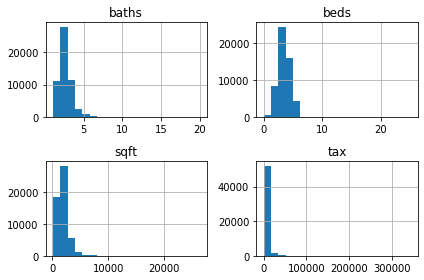

In [51]:
df.hist(bins=20)
plt.tight_layout()

*`beds` and `baths` are normally distributed*

*`sqft` and `tax` are slightly skewed right*

- Use a 2 sigma decision rule to isolate the outliers.
    - Do these make sense?
    - Should certain outliers be kept or removed?

In [55]:
x1 = df.beds
zscores1 = (x1 - x1.mean()) / x1.std()

df1 = pd.DataFrame()
df1["beds"] = x1
df1["zscore"] = abs(zscores1)

df1[zscores1 >= 2]

,beds,zscore
375,6.0,2.928877
733,6.0,2.928877
866,6.0,2.928877
892,6.0,2.928877
1021,6.0,2.928877
...,...,...
76318,6.0,2.928877
76596,11.0,8.367299
76708,6.0,2.928877
76848,6.0,2.928877


In [53]:
x2 = df.baths
zscores2 = (x2 - x2.mean()) / x2.std()

df2 = pd.DataFrame()
df2["baths"] = x2
df2["zscore"] = abs(zscores2)

df2[zscores2 >= 2]

,baths,zscore
348,5.0,2.806544
529,4.5,2.297319
593,4.5,2.297319
640,4.5,2.297319
841,4.5,2.297319
...,...,...
76476,5.0,2.806544
76596,6.0,3.824994
76683,5.0,2.806544
76929,6.0,3.824994


- Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns 

In [56]:
x1 = df.beds
zscores1 = (x1 - x1.mean()) / x1.std()

df1 = pd.DataFrame()
df1["beds"] = x1
df1["zscore"] = abs(zscores1)

df1[zscores1 >= 3]

,beds,zscore
1067,7.0,4.016561
1373,8.0,5.104246
1436,8.0,5.104246
2256,8.0,5.104246
3410,7.0,4.016561
...,...,...
76116,7.0,4.016561
76120,7.0,4.016561
76213,7.0,4.016561
76596,11.0,8.367299


In [57]:
x2 = df.baths
zscores2 = (x2 - x2.mean()) / x2.std()

df2 = pd.DataFrame()
df2["baths"] = x2
df2["zscore"] = abs(zscores2)

df2[zscores2 >= 3]

,baths,zscore
1189,7.5,5.352668
1201,5.5,3.315769
1371,6.0,3.824994
1373,10.0,7.898792
1436,8.0,5.861893
...,...,...
76291,6.0,3.824994
76318,6.0,3.824994
76388,6.0,3.824994
76596,6.0,3.824994
